# MLflow

Is a popular pool for tracking machine learning models. These pages focus on aspects of using mlflow.

Learm more:

- [Tracking server overview](https://mlflow.org/docs/latest/getting-started/tracking-server-overview/index.html#method-1-start-your-own-mlflow-server) on official mlflow site;
- [MLflow tracking quickstart](https://mlflow.org/docs/latest/getting-started/intro-quickstart/index.html) on official mlflow site;
- [Official MLflow docker image](https://mlflow.org/docs/latest/docker.html).

## Start tracking server

MLflow should have a tracking server. Here we describe how to start it locally from docker. This option will usually be used for the examples in this section.

Load docker image.

In [1]:
!docker pull ghcr.io/mlflow/mlflow &> /dev/null

The following command will start the mlflow server in docker, but it's also acceptable in the host.

In [1]:
%%bash
docker run -p 5000:5000 -dt --name my_server --rm \
    ghcr.io/mlflow/mlflow \
    bash -c "mlflow server --host 0.0.0.0 --port 5000"

b8975190736e71d255d5f3d05f05ad7a38178f045569faa06b592b899ce75644


Don't forget to stop the server after playing with it.

In [4]:
!docker stop my_server

my_server


Now you can access your mlflow UI using the browser url `localhost:5000`. Let's have a look at mlflow using the `selenium` screenshot.

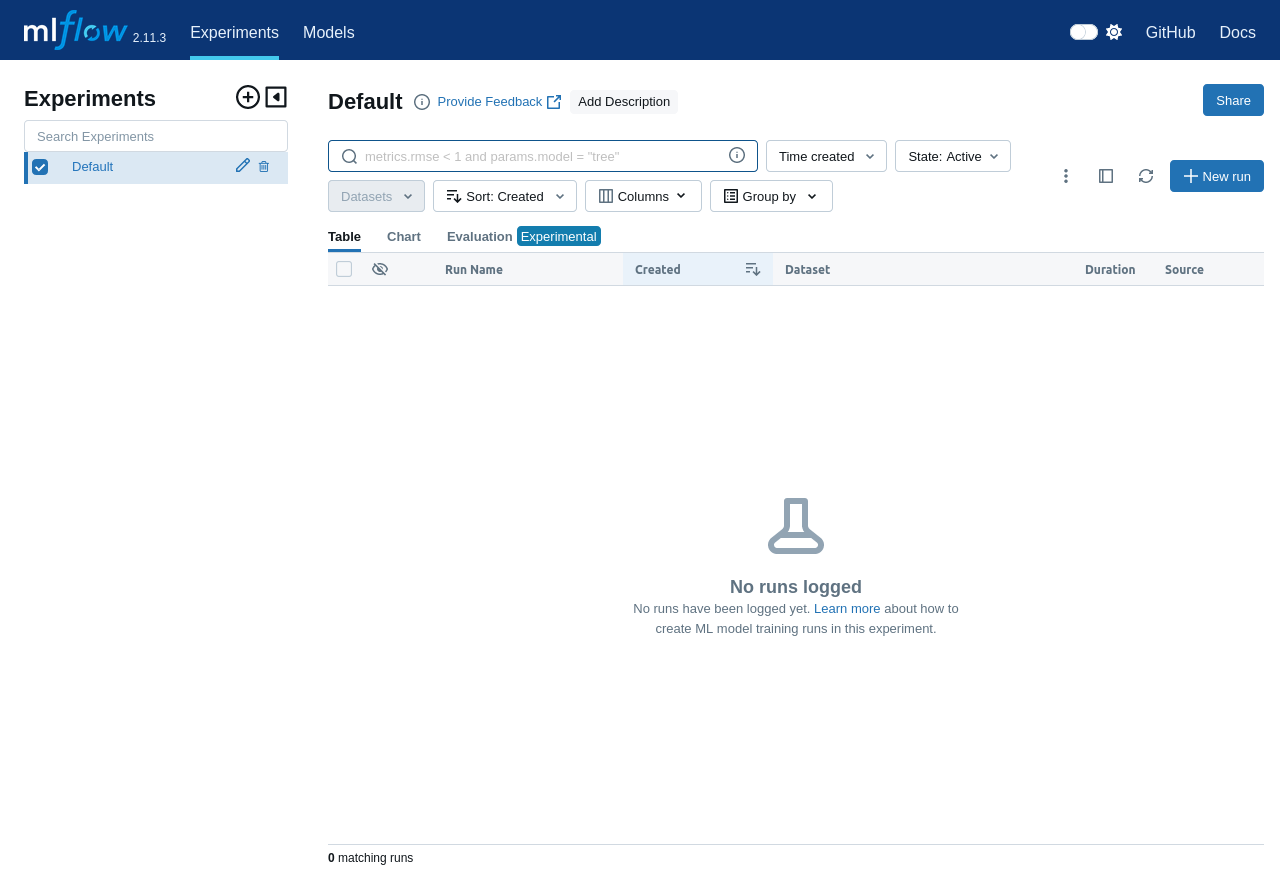

In [9]:
from time import sleep
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from PIL import Image
import io

# Set up Firefox options
options = Options()
options.binary_location = "/usr/bin/firefox"

driver = webdriver.Firefox(
    options=Options(),
    service=Service(
        # path to the geckodriver on my computer
        executable_path="/snap/bin/geckodriver",
        log_output="/dev/null"
    )
)
driver.get("http://localhost:5000")

sleep(3)

screenshot = driver.get_screenshot_as_png()
image = Image.open(io.BytesIO(screenshot))
display(image)

driver.quit()

## Connecting

Use `mlflow.set_tracking_uri` to specify the uri for the mlflow for the pythonAPI.

### Environment variables

You can specify **environment variables** to connect to MLFlow:

- `MLFLOW_TRACKING_URI`: specifies the URI that must be used to connect to the MLFLOW server.
- `MLFLOW_TRACKING_USERNAME`: specifies the username to be used to log in to MLFlow.
- `MLFLOW_TRACKING_PASSWORD`: specifies the password to be used to log in to MLFlow.

Once these variables are loaded into the Python environment, MLFlow will automatically find and use them.

## Tracking

**Tracking** is an MLFlow component that stores, visualizes, and organizes the model fitting process. It tracks what happens during model training.

A **run** is a separate attempt to train the model with given set of hyperparameters.

An **experiment** is a series of runs that represents attempts to train different models.

Find more in:

- [MLFlow Tracking Quickstart](https://mlflow.org/docs/latest/ml/tracking/quickstart/) official tutorial.
- [Tracking](mlflow/tracking.ipynb) page.